<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-0_parameters.ipynb" data-toc-modified-id="load-0_parameters.ipynb-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load 0_parameters.ipynb</a></span></li><li><span><a href="#read-exp-data" data-toc-modified-id="read-exp-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>read exp data</a></span></li><li><span><a href="#read-metadata" data-toc-modified-id="read-metadata-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>read metadata</a></span><ul class="toc-item"><li><span><a href="#GSE146771_CRC_smartseq2.raw_meta.h5ad" data-toc-modified-id="GSE146771_CRC_smartseq2.raw_meta.h5ad-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>GSE146771_CRC_smartseq2.raw_meta.h5ad</a></span></li></ul></li><li><span><a href="#archive" data-toc-modified-id="archive-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>archive</a></span></li></ul></div>

[working_dir](./)

## load 0_parameters.ipynb

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,re

In [2]:
from elpisciDSFuncs.scrnaseq import *
from nbdev.showdoc import show_doc

In [3]:
import seaborn as sns
sns.set_style("ticks"
# ,{"xtick.size": 50, "ytick.size": 50}
             ) # 这种比较符合发表的要求，并且没有 ggplot 丑陋的方块背景
## 让浏览器形成 retina 分辨率的内嵌图
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
%whos

Variable                         Type         Data/Info
-------------------------------------------------------
fn_mem_usage                     function     <function fn_mem_usage at 0x7f3a4a097820>
fn_sc_cell_ratio_histplot_main   function     <function fn_sc_cell_rati<...>t_main at 0x7f3a4a3f7820>
fn_sc_exp_df                     function     <function fn_sc_exp_df at 0x7f3a4a097700>
fn_sc_meta_info_df               function     <function fn_sc_meta_info_df at 0x7f3a4a097790>
fn_sc_pl_dotplot                 function     <function fn_sc_pl_dotplot at 0x7f3a4a3f7700>
fn_sc_pl_dotplot_format          function     <function fn_sc_pl_dotplo<...>format at 0x7f3a4add73a0>
fn_scanpy_cell_ratio_histplot    function     <function fn_scanpy_cell_<...>stplot at 0x7f3a4a3f7670>
np                               module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
os                               module       <module 'os' from '/opt/p<...>7.7/lib/python3.9/os.py'>
pd              

In [25]:
!ls -lsh *RawCounts.txt.gz

84M -rw-r--r-- 1 ubt ubt 84M 11月 13 22:26 GSE130157_14546.14554.14562.RawCounts.txt.gz
31M -rw-r--r-- 1 ubt ubt 31M 11月 13 22:26 GSE130157_15424R.15435R.RawCounts.txt.gz


In [26]:
!gunzip *.RawCounts.txt.gz

In [7]:
# !head -5 GSE130157_14546.14554.14562.RawCounts.txt | tail -4

In [57]:
a = [1,2,3]
a[:1]

[1]

In [92]:
sample_name_dict = {}
for f in ['GSE130157_14546.14554.14562.RawCounts.txt']:
    with open(f+'.filter.txt', 'w') as outfile, open(f, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.rstrip()
            itms = line.split('\t')
            if 'Gene' in line:
                print(itms[22537],itms[22538],itms[39468],itms[39469])
                sample_name_dict[f] = itms[2:22537]+itms[22539:39468]+itms[39470:]
            if len(itms)!=52272 and len(itms)!=18518:continue
            if itms[2]=='':continue
            new_line = '\t'.join(itms[2:22537]+itms[22539:39468]+itms[39470:])
            outfile.write(new_line+'\n')

Gene ID_2 Gene Symbol Gene ID_2 Gene Symbol


In [93]:
for f in ['GSE130157_15424R.15435R.RawCounts.txt']:
    with open(f+'.filter.txt', 'w') as outfile, open(f, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.rstrip()
            itms = line.split('\t')
            if 'Gene' in line:
                sample_name_dict[f] = itms[2:]
            if len(itms)!=52272 and len(itms)!=18518:continue
            if itms[2]=='':continue
            new_line = '\t'.join(itms[2:])
            outfile.write(new_line+'\n')

In [98]:
metadata_dataframe.shape

(23083, 11)

In [99]:
for i in sample_name_dict.keys():
    print(len(sample_name_dict[i]))
    # for s in sample_name_dict[i]:
    #     if s not in list(metadata_dataframe['Cell ID']):
    #         print(i,s)

52266
18516


In [96]:
for i in sample_name_dict['GSE130157_14546.14554.14562.RawCounts.txt']:
    if i in sample_name_dict['GSE130157_15424R.15435R.RawCounts.txt']:
        print(i)

Gene Symbol


In [94]:
metadata_dataframe.head()

,Cell ID,Patient ID,Time Point,Responder,Cancer,UMAP1,UMAP2,Major Cluster,Sub Cluster,patient+time,Patient
44896,14562X4_S4_AAACCTGTCCTACAGA,41GK1V,C1,Non.Responder,Liver,-5.428804,3.534370,T_Cell,T_Cell_CD8_CM,41GK1V-C1,41GK1V-C1
44902,14562X4_S4_AAACGGGGTGCACGAA,41GK1V,C1,Non.Responder,Liver,-3.941008,-2.312141,T_Cell,T_Cell_CD8_TEMRA,41GK1V-C1,41GK1V-C1
44903,14562X4_S4_AAACGGGGTGGCAAAC,41GK1V,C1,Non.Responder,Liver,-1.948269,5.983430,T_Cell,T_Cell_CD8_Naive,41GK1V-C1,41GK1V-C1
44905,14562X4_S4_AAACGGGTCTTGTTTG,41GK1V,C1,Non.Responder,Liver,-2.105546,5.974711,T_Cell,T_Cell_CD8_Naive,41GK1V-C1,41GK1V-C1
44907,14562X4_S4_AAAGCAAAGCCTTGAT,41GK1V,C1,Non.Responder,Liver,-7.116048,5.614029,T_Cell,T_Cell_CD4_EM,41GK1V-C1,41GK1V-C1


In [67]:
!pwd

/home/ubt/Documents/scRNAseq/pmid32571915--GSE130157--PBMC_large_cohort


In [68]:
# !head -2 GSE130157_14546.14554.14562.RawCounts.txt.filter.txt

In [102]:
adata.obs.head()

,Cell ID
15424X1_S1_AAACGGGCACCAGGCT,15424X1_S1_AAACGGGCACCAGGCT
15424X1_S1_AAACGGGGTCCCTACT,15424X1_S1_AAACGGGGTCCCTACT
15424X1_S1_AAAGATGCAGGTCCAC,15424X1_S1_AAAGATGCAGGTCCAC
15424X1_S1_AAAGCAAAGCCCAGCT,15424X1_S1_AAAGCAAAGCCCAGCT
15424X1_S1_AAAGCAAGTCTGCCAG,15424X1_S1_AAAGCAAGTCTGCCAG


In [106]:
import sys
sys.getsizeof(adata)/1000000
# Mb

5.575346

In [105]:
?sys.getsizeof

Docstring:
getsizeof(object [, default]) -> int

Return the size of object in bytes.
Type:      builtin_function_or_method


In [101]:
adata.obs['Cell ID'] = adata.obs.index

In [114]:
adata = sc.read_csv(
    'GSE130157_15424R.15435R.RawCounts.txt.filter.txt',
    # 5.575346 Mb
    # 'GSE130157_14546.14554.14562.RawCounts.txt.filter.txt',
    # 8.452415 Mb
    delimiter='\t')
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata = adata.T
### GSE130157_15424R.15435R.RawCounts.txt.filter.txt
# AnnData object with n_obs × n_vars = 18515 × 22114
sys.getsizeof(adata)/1000000

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


4.012323

In [115]:
adata

AnnData object with n_obs × n_vars = 18515 × 22115

In [116]:
adata.obs['Cell ID'] = adata.obs.index
# AnnData object with n_obs × n_vars = 52265 × 22115
#     obs: 'Cell ID'
adata = adata[
    adata.obs['Cell ID'].isin(list(metadata_dataframe['Cell ID'])),
].copy()
# 'GSE130157_14546.14554.14562.RawCounts.txt.filter.txt',
# (16812, 22115)
# 'GSE130157_15424R.15435R.RawCounts.txt.filter.txt',
# AnnData object with n_obs × n_vars = 6271 × 22115
#     obs: 'Cell ID'
adata

AnnData object with n_obs × n_vars = 6271 × 22115
    obs: 'Cell ID'

In [118]:
6271+16812

23083

In [117]:
adata

AnnData object with n_obs × n_vars = 6271 × 22115
    obs: 'Cell ID'

In [84]:
b_var_name = adata.var_names

In [82]:
a_var_name = adata.var_names

In [90]:
fn_mem_usage(adata)

AttributeError: 'AnnData' object has no attribute 'memory_usage'

In [89]:
show_doc(fn_mem_usage)

<h4 id="fn_mem_usage" class="doc_header"><code>fn_mem_usage</code><a href="https://github.com/davehuang2021/elpisciDSFuncs/tree/The default branch of your GitHub repo (usually either master or main)/elpisciDSFuncs/scrnaseq.py#L556" class="source_link" style="float:right">[source]</a></h4>

> <code>fn_mem_usage</code>(**`pandas_obj`**)

By davehuang@elpiscience.com. <br>Contact me if find any bug or issue while using this func.<br><br>    用于检查 dataframe 对象的内存使用量，避免耗尽内存导致服务器宕机。<br>    

In [88]:
for i in range(0,len(b_var_name)):
    if a_var_name[i]!=b_var_name[i]:
        print(a_var_name[i],b_var_name[i])

In [76]:
len(adata.var_names)
# GSE130157_14546.14554.14562.RawCounts.txt.filter.txt
# 22115

22115

In [74]:
adata.X[:20,:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [9]:
for i in ['GSE130157_14546.14554.14562.RawCounts.txt','GSE130157_15424R.15435R.RawCounts.txt']:
    print(i)
    df_dict[i] = pd.read_csv(
        i,
        compression='gzip',
        sep='\t'
    )

GSE130157_14546.14554.14562.RawCounts.txt.gz


KeyboardInterrupt: 

In [73]:
# import ray
# ray.shutdown()
# ray.init()
# import modin.pandas as pd

## read exp data

In [74]:
def exp_df(file ,**kwargs):
    nrows = 0 if 'header' in kwargs.keys() else None
    Height = kwargs['Height'] if 'Height' in kwargs.keys() else 4
    size   = kwargs['size']   if 'size'   in kwargs.keys() else 25


    index_col_name = kwargs['_index_col_name']
    Sep            = kwargs['_sep']
    
    data_type = {}
    for i in pd.read_csv(
            file,
            compression='gzip',
            dtype=data_type,
            index_col=False, 
            nrows=0,
            sep=Sep).set_index(index_col_name).T.index:
        data_type[i] =np.float32
        
    count_dataframe = pd.read_csv(
        file, # where to find the data
        compression='gzip',
        dtype=data_type,
        index_col=False, 
        nrows=nrows,
        sep=Sep) # use the first column to label the rows (the 'index')

#     count_dataframe = count_dataframe.astype({index_col_name: 'category'})
    count_dataframe = count_dataframe.set_index(index_col_name).T
    return count_dataframe

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # 我们假设这不是一个df，而是一个 Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # 将 bytes 转化成 megabytes
    return "{:03.2f} MB".format(usage_mb)

In [75]:
# %%time
# # gzip GSE132465_GEO_processed_CRC_10X_natural_log_TPM_matrix.txt
# count_dataframe = exp_df(
# #     'GSE146771_CRC.Leukocyte.Smart-seq2.TPM.format.txt.gz', 
# #     (10468, 15179)
# # CPU times: user 58.2 s, sys: 18.7 s, total: 1min 16s
# # Wall time: 1min 16s    

#     _index_col_name='Index', 
#     _sep='\t'
# )

In [76]:
# print(mem_usage(count_dataframe))
# 8191.02 MB

## read metadata

In [77]:
def meta_info_df(file, **kwargs):
# **kwargs
# - file: meta 信息保存的文件
# - sep: meta table 的各式符号，一般为 '\t' or ','
# - index_col_name: 用来排序并与 exp table 整合用的列的名称，一般为细胞的ID
    if 'sep' in kwargs.keys():
        SEP = kwargs['_sep']
    else:
        SEP = '\t'
    if '_index_col_name' in kwargs.keys():
        index_col_name = kwargs['_index_col_name']
    if '_count_dataframe_index' in kwargs.keys():
        count_dataframe_index = kwargs['_count_dataframe_index'] #list(count_dataframe.index)
    metadata_dataframe = pd.read_csv(
        file,
        compression='gzip',
        sep=SEP,
        index_col=False) # use the first column as the index
    metadata_dataframe[index_col_name] = metadata_dataframe[index_col_name].astype("category")
    
    metadata_dataframe[index_col_name].cat.set_categories(
        ### 按照表达矩阵的样品的序列排序，否则会报错
        count_dataframe_index, #= list(count_dataframe.index), 
        inplace=True)
    metadata_dataframe.sort_values(index_col_name, inplace=True)
    metadata_dataframe = metadata_dataframe.set_index(index_col_name)

    return metadata_dataframe

In [78]:
!ls

0_GEO2h5ad-GSE130157.ipynb  GSE130157.cell_annotations.txt.gz


In [6]:
show_doc(fn_sc_meta_info_df)

<h4 id="fn_sc_meta_info_df" class="doc_header"><code>fn_sc_meta_info_df</code><a href="https://github.com/davehuang2021/elpisciDSFuncs/tree/The default branch of your GitHub repo (usually either master or main)/elpisciDSFuncs/scrnaseq.py#L502" class="source_link" style="float:right">[source]</a></h4>

> <code>fn_sc_meta_info_df</code>(**`file`**, **\*\*`kwargs`**)

By davehuang@elpiscience.com. <br>Contact me if find any bug or issue while using this func.<br><br>    用于 scRNAseq 项目的读取表达矩阵<br><br>    EXAMPLE:<br>    example_1:<br>    count_dataframe_index = list(count_dataframe.index)<br>    metadata_dataframe = fn_sc_meta_info_df('GSE146771_CRC.Leukocyte.Smart-seq2.Metadata.txt.gz',_sep='       ',_index_col_name='CellName',_count_dataframe_index = count_dataframe_index)<br>    

In [9]:
metadata_dataframe = pd.read_csv(
        'GSE130157.cell_annotations.txt.gz',
        compression='gzip',
        sep='\t',
        index_col=False) 

In [10]:
metadata_dataframe.keys()

Index(['Cell ID', 'Patient ID', 'Time Point', 'Responder', 'Cancer', 'UMAP1',
       'UMAP2', 'Major Cluster', 'Sub Cluster'],
      dtype='object')

In [11]:
metadata_dataframe['patient+time'] = metadata_dataframe['Patient ID']+'-'+metadata_dataframe['Time Point']

In [12]:
metadata_dataframe.sort_values(['Responder','Patient ID','Time Point'],inplace=True)

In [13]:
metadata_dataframe['patient+time'].value_counts()

Y9YB6A-C1     2993
41GK1V-C5     2415
BXP7T7-C1     2358
TH8LA0-C3     2353
FSYDY4-EOT    2289
41GK1V-C1     2212
Y9YB6A-C3     2206
FSYDY4-C1     2198
BXP7T7-C3     2185
4F0C6K-C5     2106
FSYDY4-C5     2074
P3NSMW-EOT    2015
Y9YB6A-C5     1993
TH8LA0-C1     1893
TH8LA0-C15    1892
HJD33E-EOT    1850
BXP7T7-C5     1818
P3NSMW-C3     1817
41GK1V-C3     1771
Y9YB6A-C13    1691
P3NSMW-C1     1620
P3N06Q-C5     1571
P3N06Q-C1     1447
77YUY3-C1     1384
HJD33E-C1     1354
77YUY3-C3     1309
HJD33E-C3     1307
FSYDY4-C3     1306
TH8LA0-C5     1299
6YEP4H-C5     1282
RPL2G3-C1     1197
77YUY3-C5     1174
HJD33E-C5     1138
P3NSMW-C5     1059
M1N4R5-C3     1022
M1N4R5-C5     1020
RPL2G3-C5     1017
6YEP4H-C1      993
RPL2G3-C3      987
6YEP4H-C3      960
M1N4R5-C1      918
P3N06Q-C3      874
4F0C6K-C1      841
4F0C6K-C3      537
Name: patient+time, dtype: int64

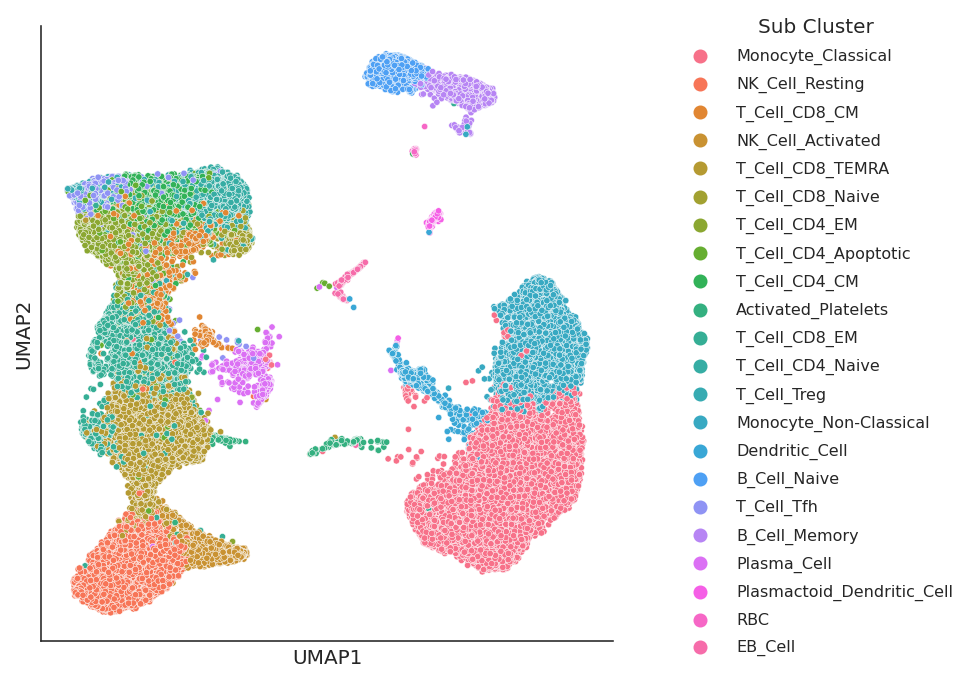

In [14]:
g = sns.relplot(
data=metadata_dataframe[
    metadata_dataframe['Time Point']!='EOT'
],
x="UMAP1",
y="UMAP2",
hue="Sub Cluster",
s=10,
# col='patient+time', 
#     col_wrap=6,
height=5, aspect=1,

#     facet_kws=dict(legend_out=False)
    
).set(
# yticklabels=[],xticklabels=[],
xticks=[],yticks=[]
);

leg = g._legend
# leg.set_bbox_to_anchor([0.1, 0.8])  # coordinates of lower left of bounding box
plt.setp(g._legend.get_texts(), fontsize=8)
leg._loc = 1  # if required you can set the loc

# plot = sns.relplot(x='time', y='value', col='category3', hue='category1', style='category2', kind="line", col_wrap=2, data=df, facet_kws=dict(legend_out=False))


In [15]:
metadata_dataframe['Patient'] = metadata_dataframe['patient+time']

In [16]:
metadata_dataframe['Major Cluster'] = metadata_dataframe['Major Cluster'].astype('category')

In [17]:
np.unique(list(metadata_dataframe['Major Cluster']))

array(['Activated_Platelets', 'B_Cell', 'Dendritic_Cell', 'EB_Cell',
       'Monocyte', 'NK_Cell', 'Plasma_Cell', 'Plasmactoid_Dendritic_Cell',
       'RBC', 'T_Cell', 'nan'], dtype='<U32')

In [18]:
metadata_dataframe

,Cell ID,Patient ID,Time Point,Responder,Cancer,UMAP1,UMAP2,Major Cluster,Sub Cluster,patient+time,Patient
44893,14562X4_S4_AAACCTGAGCGTGAAC,41GK1V,C1,Non.Responder,Liver,6.854331,-2.224640,Monocyte,Monocyte_Classical,41GK1V-C1,41GK1V-C1
44894,14562X4_S4_AAACCTGAGGGTCGAT,41GK1V,C1,Non.Responder,Liver,-5.831578,-7.005017,NK_Cell,NK_Cell_Resting,41GK1V-C1,41GK1V-C1
44895,14562X4_S4_AAACCTGCAGGAACGT,41GK1V,C1,Non.Responder,Liver,5.635554,-6.267796,Monocyte,Monocyte_Classical,41GK1V-C1,41GK1V-C1
44896,14562X4_S4_AAACCTGTCCTACAGA,41GK1V,C1,Non.Responder,Liver,-5.428804,3.534370,T_Cell,T_Cell_CD8_CM,41GK1V-C1,41GK1V-C1
44897,14562X4_S4_AAACCTGTCCTTGACC,41GK1V,C1,Non.Responder,Liver,5.619621,-2.821650,NaN,NaN,41GK1V-C1,41GK1V-C1
...,...,...,...,...,...,...,...,...,...,...,...
20703,14546X11_S11_TTTGTCAAGTAGGTGC,Y9YB6A,C5,Responder,Liver,9.558059,0.629986,Monocyte,Monocyte_Non-Classical,Y9YB6A-C5,Y9YB6A-C5
20704,14546X11_S11_TTTGTCAGTGACGCCT,Y9YB6A,C5,Responder,Liver,-7.228646,-7.785320,NK_Cell,NK_Cell_Resting,Y9YB6A-C5,Y9YB6A-C5
20705,14546X11_S11_TTTGTCAGTGTAACGG,Y9YB6A,C5,Responder,Liver,9.032482,-4.607453,Monocyte,Monocyte_Classical,Y9YB6A-C5,Y9YB6A-C5
20706,14546X11_S11_TTTGTCAGTTAGATGA,Y9YB6A,C5,Responder,Liver,-7.200834,-7.492773,NK_Cell,NK_Cell_Resting,Y9YB6A-C5,Y9YB6A-C5


In [19]:
metadata_dataframe['Patient ID'].value_counts()

Y9YB6A    8883
FSYDY4    7867
TH8LA0    7437
P3NSMW    6511
41GK1V    6398
BXP7T7    6361
HJD33E    5649
P3N06Q    3892
77YUY3    3867
4F0C6K    3484
6YEP4H    3235
RPL2G3    3201
M1N4R5    2960
Name: Patient ID, dtype: int64

[Text(0.5, 23.0, ''), Text(733.3739130434783, 0.5, ''), [], []]

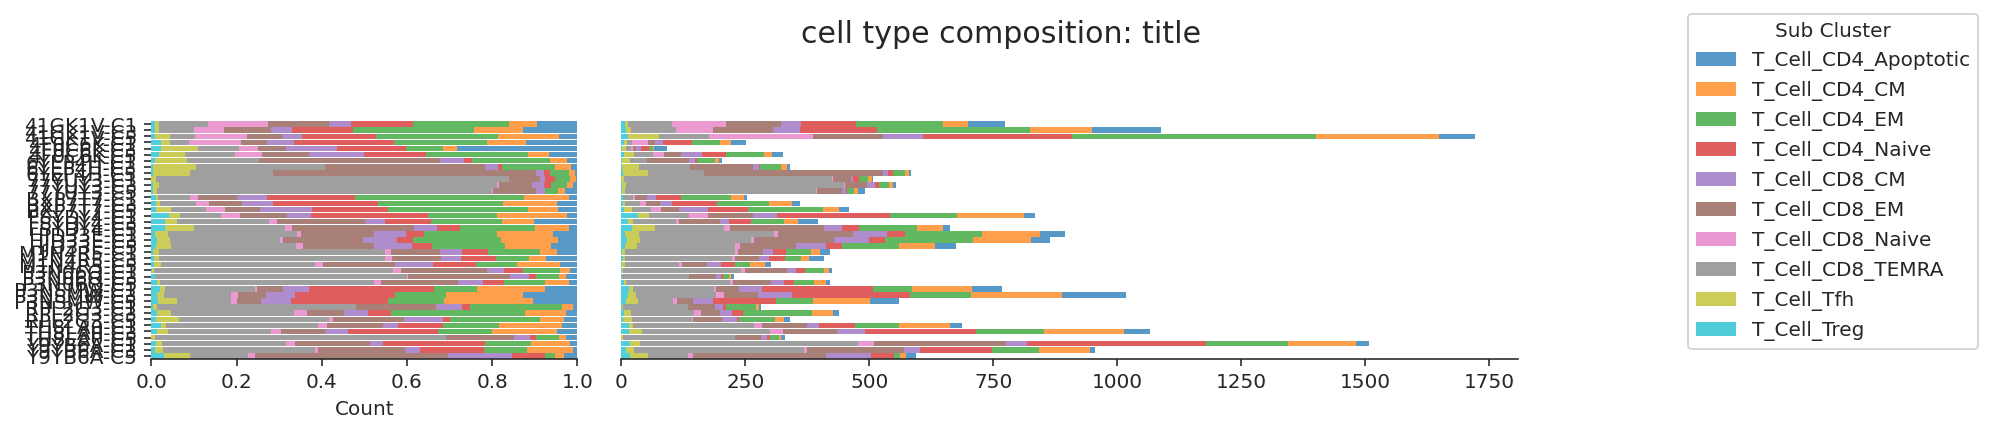

In [24]:
metadata_dataframe = metadata_dataframe[
    metadata_dataframe['Major Cluster']=='T_Cell'
]
# fn_scanpy_cell_ratio_histplot(df,patient_reorder,hue,hue_order)
fn_scanpy_cell_ratio_histplot(
    metadata_dataframe,
    np.unique(metadata_dataframe['patient+time']),
    'Sub Cluster',
    np.unique(list(metadata_dataframe['Sub Cluster'])),
        'title'
)

In [22]:
show_doc(fn_scanpy_cell_ratio_histplot)

<h4 id="fn_scanpy_cell_ratio_histplot" class="doc_header"><code>fn_scanpy_cell_ratio_histplot</code><a href="https://github.com/davehuang2021/elpisciDSFuncs/tree/The default branch of your GitHub repo (usually either master or main)/elpisciDSFuncs/scrnaseq.py#L310" class="source_link" style="float:right">[source]</a></h4>

> <code>fn_scanpy_cell_ratio_histplot</code>(**`df`**, **`patient_reorder`**, **`hue`**, **`hue_order`**, **`title`**)

By davehuang@elpiscience.com. <br>Contact me if find bug or issue while using this func.<br><br>    用于绘制基于 data_name 的 patient sample single cell composition barplot，以展示 TME 中各免疫细胞亚群的绝对数量和百分比/相对数量.<br>    请使用主程序 fn_scanpy_cell_ratio_histplot_main.

[Text(0.5, 23.0, ''), Text(733.3739130434783, 0.5, ''), [], []]

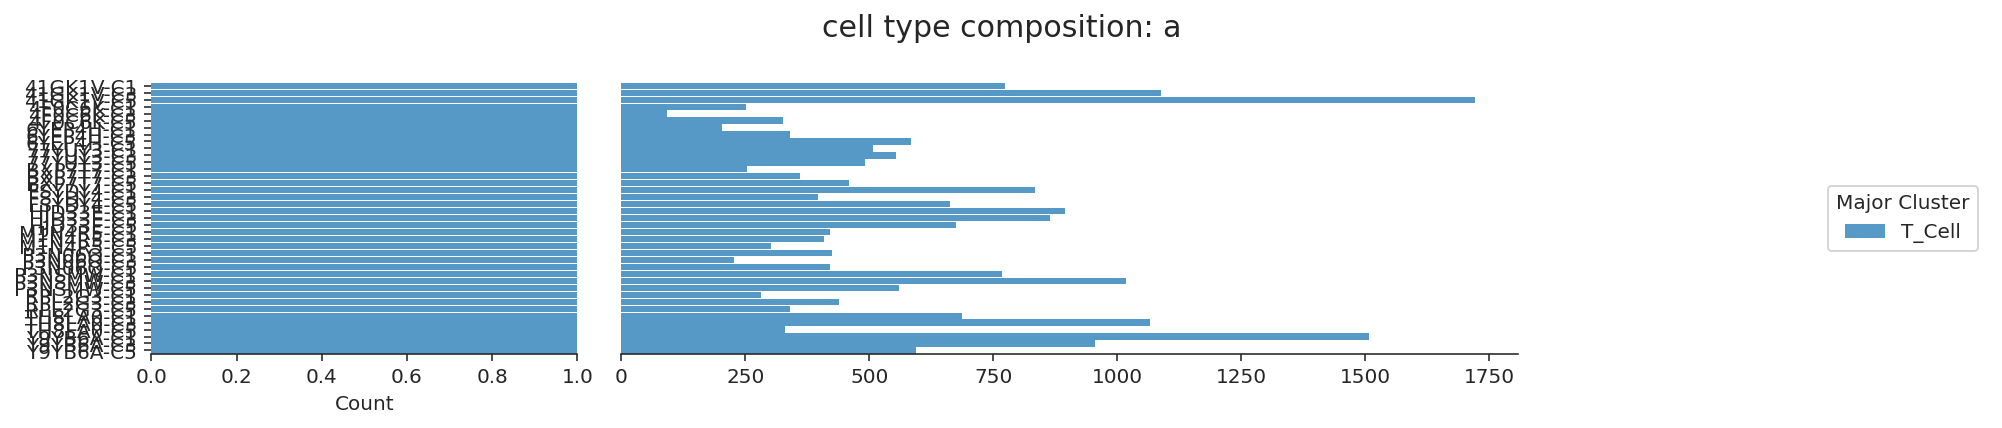

In [23]:
# fn_scanpy_cell_ratio_histplot(df,patient_reorder,hue,hue_order)
fn_scanpy_cell_ratio_histplot(
    metadata_dataframe,
    np.unique(metadata_dataframe['patient+time']),
    'Major Cluster',
    np.unique(list(metadata_dataframe['Major Cluster'])),
    'title'
)

In [64]:
# hue_order=['Myeloids','Epithelial cells','Stromal cells','B cells','Mast cells','T cells',]

# df = adataFilterPatient[
#         (adataFilterPatient.obs.Class!='Normal')
# #     (adata.obs.Class=='Border')
# #     (adata.obs.Class=='Tumor')
#     ,].obs.copy()
from textwrap import wrap
def fn_scanpy_cell_ratio_histplot(df,patient_reorder,hue,hue_order):
    a=df
    a['Patient'] = a['Patient'].astype('category')
    a['Patient'] = a['Patient'].cat.set_categories(
        ### 按照表达矩阵的样品的序列排序，否则会报错
        patient_reorder, #= list(count_dataframe.index), 
    )
    a[hue] = a[hue].astype('category')
    a[hue] = a[hue].cat.set_categories(
        ### 按照表达矩阵的样品的序列排序，否则会报错
        hue_order, #= list(count_dataframe.index), )
    )



    plt.close('all')
    fig = plt.figure(figsize=(14,8))
    # plt.rcParams['savefig.facecolor'] = "0.8"
    plt.rcParams['axes.ymargin'] = 0

    plt.rcParams['axes.spines.left']   = False
    plt.rcParams['axes.spines.right']  = False
    plt.rcParams['axes.spines.top']    = False
    plt.rcParams['axes.spines.bottom'] = True

    ax1 = plt.subplot2grid((1, 4), (0, 0))
    ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=2,)
    axt = plt.subplot2grid((1, 4), (0, 3))
    axt.set_frame_on(False)

    # metadata_dataframe[index_col_name] = metadata_dataframe[index_col_name].astype("category")

    # metadata_dataframe[index_col_name].cat.set_categories(
    #     ### 按照表达矩阵的样品的序列排序，否则会报错
    #     count_dataframe_index, #= list(count_dataframe.index), 
    #     inplace=True)


    sns.histplot(
        a, 
        y="Patient", 
        hue=hue, 
        stat="count",
    # stat : {"count", "frequency", "density", "probability"}
    #     Aggregate statistic to compute in each bin.

    #     - ``count`` shows the number of observations
    #     - ``frequency`` shows the number of observations divided by the bin width
    #     - ``density`` normalizes counts so that the area of the histogram is 1
    #     - ``probability`` normalizes counts so that the sum of the bar heights is 1

        multiple="stack", 
    # multiple : {"layer", "dodge", "stack", "fill"}
    #     Approach to resolving multiple elements when semantic mapping creates subsets.
    #     Only relevant with univariate data.    
        shrink=.9,
        linewidth=0,
        legend=False,
        cbar=True,
        ax=ax2,
    #     hue_order=hue_order,
    ).set(title='',xlabel='',ylabel='',yticks=[],)

    # 2
    sns.histplot(
        a, 
        y="Patient", 
        hue=hue, 
        stat="count",
        multiple="fill", 
        shrink=.9,
        linewidth=0,
        legend=False,
        ax=ax1,
    ).set(ylabel='',title='')
    #     xlabel='',yticks=[],

    # legend
    sns.histplot(
        a, 
        y="Patient", 
        hue=hue, 
        stat="count",
        multiple="stack", 
        shrink=0,
        linewidth=0,
    #     legend=False,
        ax=axt
    ).set(xlabel='',ylabel='',yticks=[],xticks=[])
    #      xlim=(1400,1800),

#     plt.suptitle(
#         '\n'.join(wrap('cell type composition, 10X',30))
#     #     'PBMC cell type composition'
#                      ,fontsize = 15)
    plt.tight_layout()
    # plt.savefig('1_tSNE-2_patient_cell_count-cell_composition.pdf', dpi = 150)

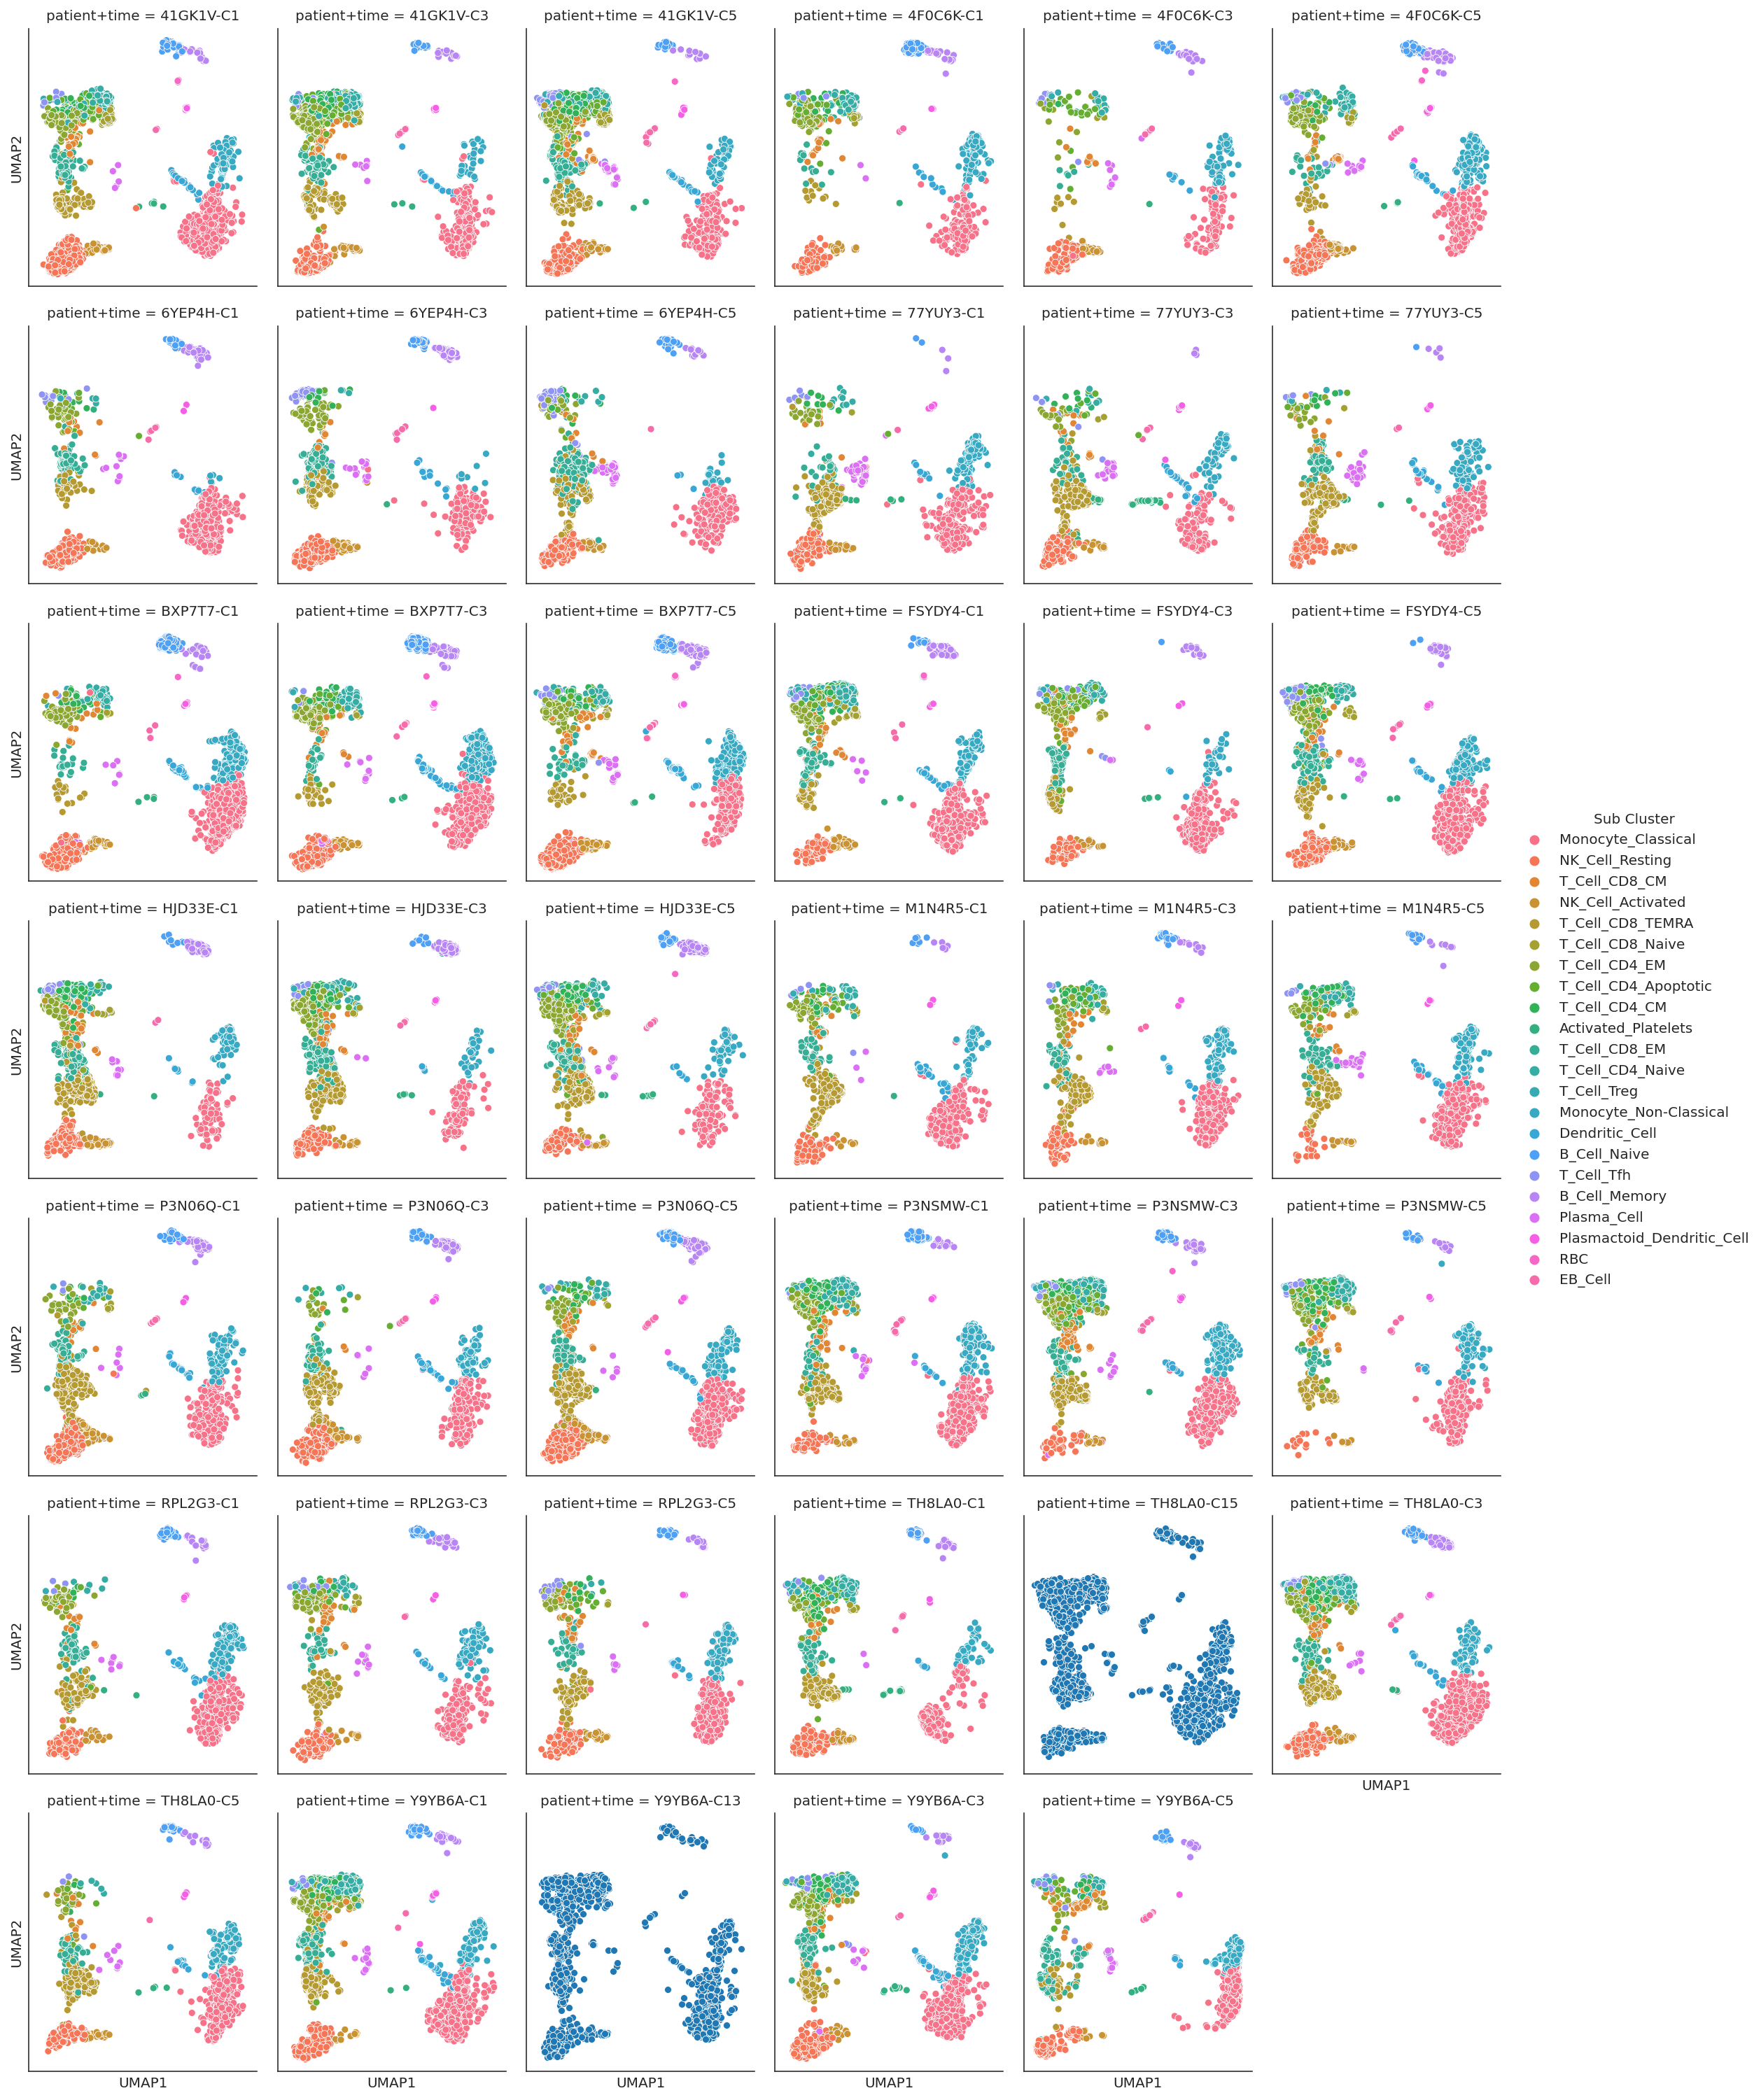

In [31]:
sns.relplot(
data=metadata_dataframe[
    metadata_dataframe['Time Point']!='EOT'
],
x="UMAP1",
y="UMAP2",
hue="Sub Cluster",
s=25,
col='patient+time', 
    col_wrap=6,
height=3, aspect=0.85
).set(
# yticklabels=[],xticklabels=[],
xticks=[],yticks=[]
);

In [9]:
%%time
metadata_dataframe = meta_info_df(
#     'GSE146771_CRC.Leukocyte.Smart-seq2.TPM.format.txt.gz', 
#     (10468, 15179)
#     'GSE146771_CRC.Leukocyte.Smart-seq2.Metadata.txt.gz',
# (10468, 22)      
# CPU times: user 50.6 ms, sys: 9.06 ms, total: 59.6 ms
# Wall time: 60.9 ms    
    'GSE130157.cell_annotations.txt.gz',
    _sep='\t',
    _index_col_name = 'Index',
    _count_dataframe_index = count_dataframe_index
)

NameError: name 'count_dataframe_index' is not defined

In [13]:
print(list(metadata_dataframe.keys()))

['Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype']


In [14]:
# metadata_dataframe.Patient.value_counts()

In [15]:
# metadata_dataframe = metadata_dataframe.rename(columns={'Sample':'Patient'})

### GSE146771_CRC_smartseq2.raw_meta.h5ad

In [16]:
adata = sc.AnnData(
    X = count_dataframe, 
    obs = metadata_dataframe)

# adata.write('GSE146771_CRC_smartseq2.raw_meta.h5ad')
adata.write('GSE132465_processed_SMC_CRC_10X.logTPM_meta.h5ad')

/opt/Python/3.7.7/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'Patient' as categorical
... storing 'Class' as categorical
... storing 'Sample' as categorical
... storing 'Cell_type' as categorical
... storing 'Cell_subtype' as categorical


In [18]:
print(mem_usage(count_dataframe))
# count_dataframe:8191.02 MB

8191.02 MB


In [22]:
# del adata
# del count_dataframe

## archive

In [19]:
%%javascript
IPython.notebook.kernel.execute(`notebookName = '${IPython.notebook.notebook_name}'`);

<IPython.core.display.Javascript object>

In [20]:
import os,re
### 将本文件转化为html作为备份
# %%javascript
# IPython.notebook.kernel.execute(`notebookName = '${IPython.notebook.notebook_name}'`);
try:
    notebookName
except NameError:
    notebookName = 'KIRC_publication_redo.ipynb'
notebookName = '.'.join(notebookName.split('.')[:-1])
html_files = list(os.popen('ls ./'+notebookName+'.V*.html'))
html_version = 0
if len(html_files)==0:
    html_version = 1
else:    
    html_versions = []
    for f in html_files:
        if '.CODE' in f:continue
        f = re.compile(r'V(\d+)').search(f.strip().split('.')[-2]).group(1)
        html_versions.append(int(f))
    html_version = np.max(html_versions)+1
cmd = 'jupyter nbconvert '+notebookName+'.ipynb'+' --to html --output '+notebookName+'.V'+str(html_version)
os.popen(cmd+'.CODE')
os.popen(cmd+' --no-input')
### 转化
# !jupyter nbconvert KIRC_publication_redo.ipynb --no-input --to html --output KIRC_publication_redo.V3